In [1]:
from PIL import Image
import numpy as np
import cv2
import math
import os
from utils import *


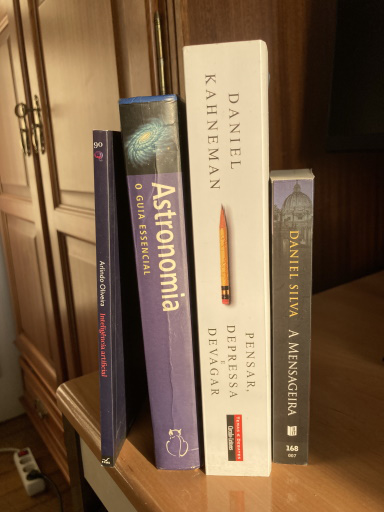

In [2]:
notebook_path = os.getcwd()

image_path = f'{notebook_path}\images\IMG_1770.jpg'

pil_image = Image.open(image_path)

display(pil_image)

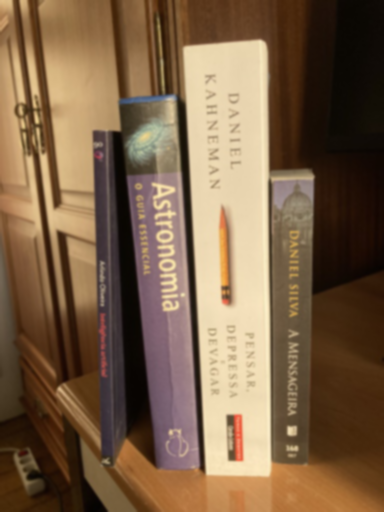

In [3]:
# Breaking down the detect_spines function

img = pil_image_to_opencv_image(pil_image)

height, width, _ = img.shape
    
blur = cv2.GaussianBlur(img, (5, 5), 0)
pil_image_disp = opencv_image_to_pil_image(blur)
display(pil_image_disp)


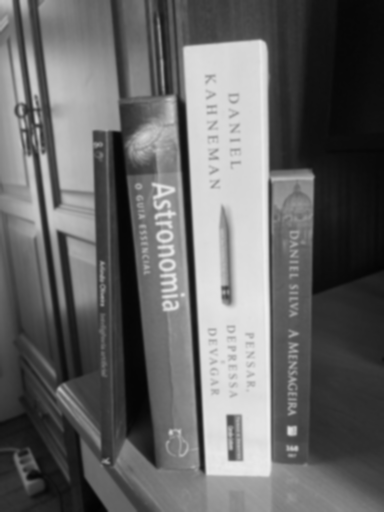

In [4]:
gray = cv2.cvtColor(blur, cv2.COLOR_BGR2GRAY)    
pil_image_disp = opencv_image_to_pil_image(gray)
display(pil_image_disp)


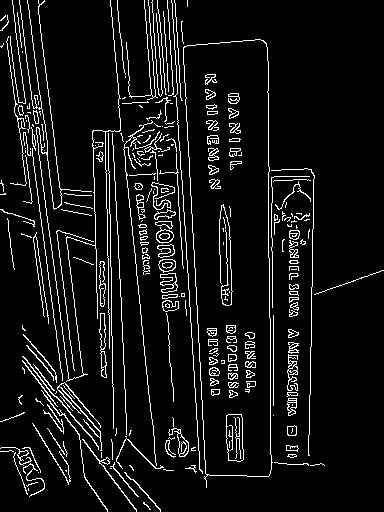

In [5]:
edge = cv2.Canny(gray, 50, 70)
pil_image_disp = opencv_image_to_pil_image(edge)
display(pil_image_disp)


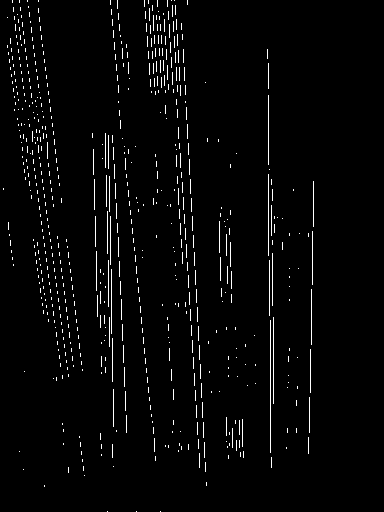

In [6]:
kernel = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0]], dtype=np.uint8)

img_erosion = cv2.erode(edge, kernel, iterations=1)
pil_image_disp = opencv_image_to_pil_image(img_erosion)
display(pil_image_disp)


In [7]:
img = pil_image_to_opencv_image(pil_image)

detect_spines(img)

[((99, 512), (37, 0)),
 ((162, 512), (108, 0)),
 ((132, 512), (105, 0)),
 ((204, 512), (168, 0)),
 ((273, 512), (264, 0)),
 ((307, 512), (316, 0)),
 ((500, 512), (500, 0))]

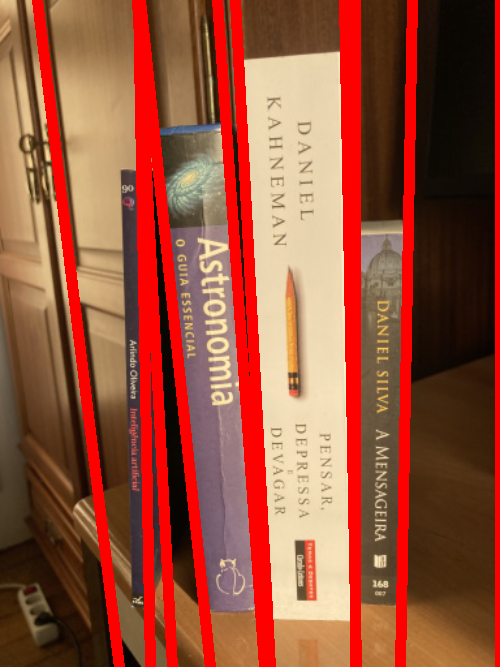

In [8]:
img = pil_image_to_opencv_image(pil_image)

final_image = resize_img(img)
final_points = detect_spines(final_image)

for point in final_points:
    ((x1, y1), (x2, y2)) = point
    final_image = cv2.line(final_image, (x1, y1), (x2, y2), (0, 0, 255), 10)

pil_image_disp_w_lines = opencv_image_to_pil_image(final_image)

display(pil_image_disp_w_lines)

In [9]:
img = pil_image_to_opencv_image(pil_image)

final_image = resize_img(img)
final_points = detect_spines(final_image)

cropped_images = get_cropped_images(final_image, final_points)

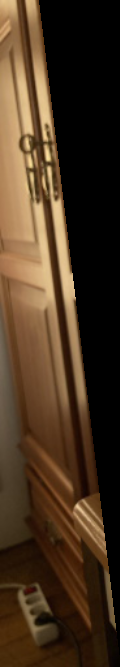

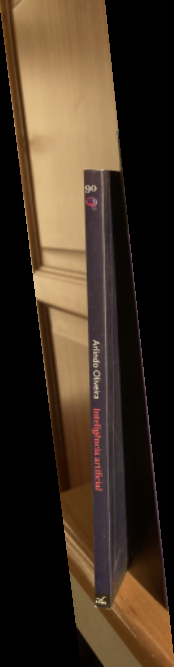

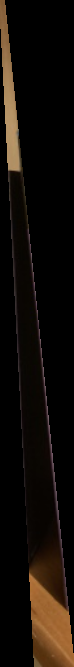

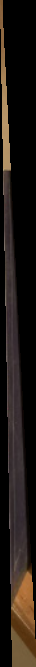

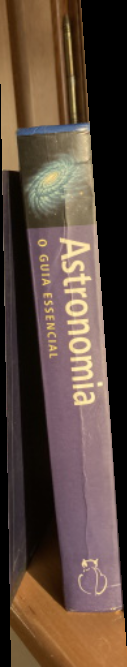

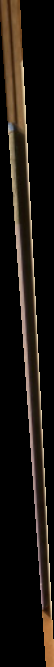

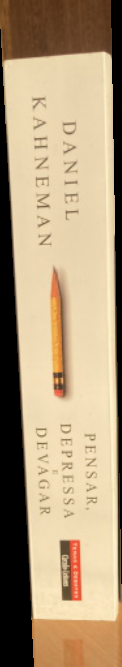

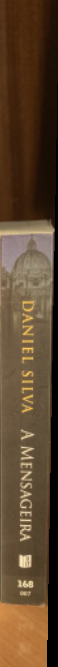

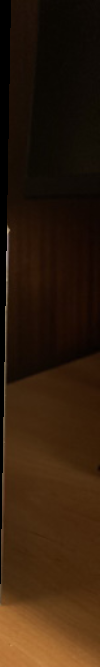

In [10]:
for img in cropped_images:
    pil_image = opencv_image_to_pil_image(img)
    display(pil_image)